In [40]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#load dataset
df = pd.read_csv("hist.csv")
df.columns = [
    "week_id",
    "customer_id",
    "attribute1",
    "state_id",
    "Sex",
    "campaign_id",
    "response"
]
df.head()

,week_id,customer_id,attribute1,state_id,Sex,campaign_id,response
0,1,2,A,38,F,2,0
1,1,3,C,46,M,3,0
2,1,4,B,35,M,4,0
3,1,5,B,22,M,5,1
4,1,6,B,39,F,6,1


In [41]:
print("Mising values:\n", df.isnull().sum())

Mising values:
 week_id        0
customer_id    0
attribute1     0
state_id       0
Sex            0
campaign_id    0
response       0
dtype: int64


In [42]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_processed = df.copy()
le_attr = LabelEncoder()
le_sex = LabelEncoder()

df_processed["attribute1"] = le_attr.fit_transform(df_processed["attribute1"])
df_processed["Sex"] = le_sex.fit_transform(df_processed["Sex"])

print("n\Summary Statistics:\n", df_processed.describe())

n\Summary Statistics:
              week_id    customer_id     attribute1       state_id  \
count  259999.000000  259999.000000  259999.000000  259999.000000   
mean       13.500048    5211.720041       1.538602      25.293890   
std         7.499989    3307.137057       1.074950      14.425228   
min         1.000000       1.000000       0.000000       1.000000   
25%         7.000000    2501.000000       1.000000      13.000000   
50%        14.000000    5001.000000       1.000000      25.000000   
75%        20.000000    7500.500000       2.000000      38.000000   
max        26.000000   13200.000000       3.000000      50.000000   

                 Sex    campaign_id       response  
count  259999.000000  259999.000000  259999.000000  
mean        0.449298       5.500017       0.424452  
std         0.497424       2.872279       0.494260  
min         0.000000       1.000000       0.000000  
25%         0.000000       3.000000       0.000000  
50%         0.000000       6.000000  

<>:11: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\S'
/var/folders/k_/xp7x333n58ldxmq66j52fhyr0000gn/T/ipykernel_21218/2710461893.py:11: SyntaxWarning: invalid escape sequence '\S'
  print("n\Summary Statistics:\n", df_processed.describe())


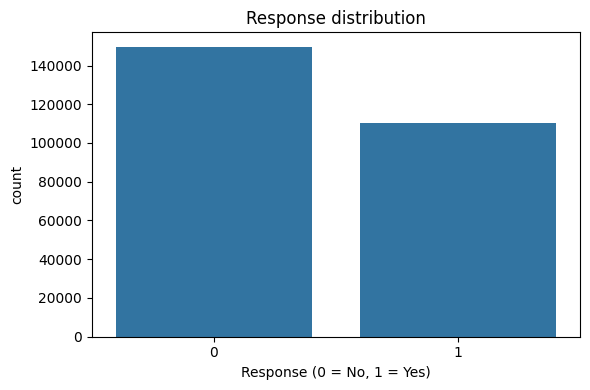

In [43]:
# plot response distribution
plt.figure(figsize=(6,4))
sns.countplot(x="response", data=df_processed)
plt.title("Response distribution")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("count")
plt.tight_layout()
plt.show()

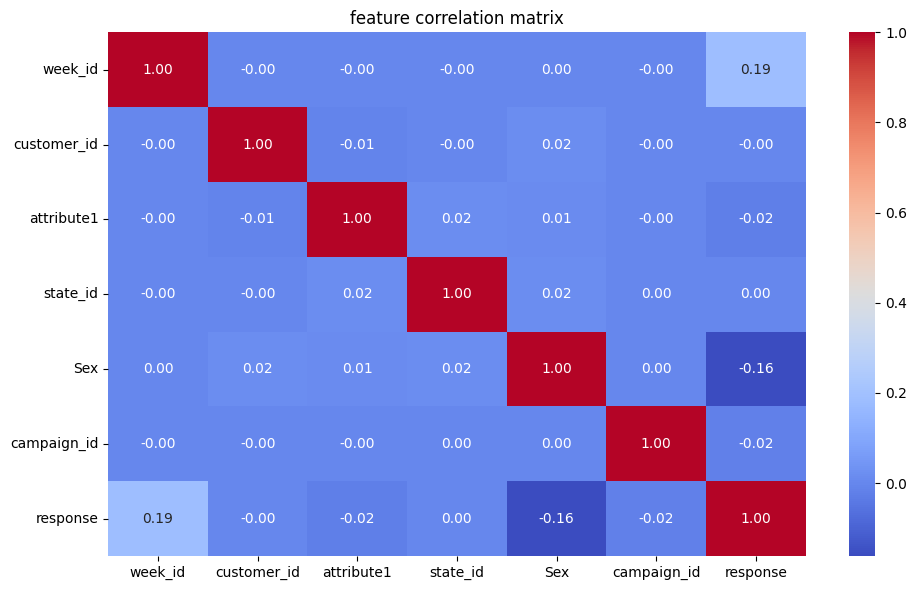

In [44]:
# Correlation heatmap
plt.figure(figsize=(10,6))
correlation_matrix = df_processed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("feature correlation matrix")
plt.tight_layout()
plt.show()

In [45]:
# Feature selection and train-test split

features = ["attribute1", "state_id", "Sex", "campaign_id"]
X = df_processed[features]
y = df_processed["response"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# train model
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
# evaluate model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.2%}")
print("\nClassification Report:\n", report)


Model Accuracy: 71.62%

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75     29765
           1       0.66      0.70      0.68     22235

    accuracy                           0.72     52000
   macro avg       0.71      0.71      0.71     52000
weighted avg       0.72      0.72      0.72     52000



In [48]:
# Feature importance
importances = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)
print("\nFeature Importances:\n", importances)


Feature Importances:
        Feature  Importance
0   attribute1    0.624857
2          Sex    0.179829
1     state_id    0.105592
3  campaign_id    0.089723


In [ ]:
# Week 27 Prediction
week26_data = df_processed[df_processed["week_id"] == 26].copy()
X_week27 = week26_data[features]
week26_data["predicted_response"] = model.predict_proba(X_week27)[:, 1]

In [ ]:
# top 25% likely responders
top_25_count = int(0.25 * len(week26_data))
top_25_subscribers = week26_data.sort_values(by="predicted_response", ascending=False).head(top_25_count)

In [58]:
print("Subscribers to send emails to (top 25%):")
print(top_25_subscribers["customer_id"].values[:10]) 

Subscribers to send emails to (top 25%):
[ 5819  3649  7769  5869  5496  9126 12596    21  8632  2749]


In [51]:

# Assign rotated campaign for week 27
top_25_subscribers["campaign_id_week27"] = top_25_subscribers["campaign_id"].apply(lambda x: 1 if x == 10 else x + 1)
print(top_25_subscribers)

        week_id  customer_id  attribute1  state_id  Sex  campaign_id  \
255817       26         5819           0        24    1            4   
253647       26         3649           0        24    1            4   
257767       26         7769           0        19    1            4   
255867       26         5869           0        19    1            4   
255494       26         5496           0         2    1            1   
...         ...          ...         ...       ...  ...          ...   
250427       26          429           0        18    0            4   
259927       26        13129           0        18    0            4   
259247       26         9249           0        18    0            4   
257921       26         7923           0        12    1            8   
255135       26         5137           3        14    0            2   

        response  predicted_response  campaign_id_week27  
255817         1            0.966343                   5  
253647         1 

In [52]:
# Estimate expected response rate
expected_response_rate = top_25_subscribers["predicted_response"].mean()
print(f"\nExpected Response Rate for Week 27: {expected_response_rate:.2%}")


Expected Response Rate for Week 27: 74.19%


In [53]:
# final list
top_25_subscribers[["customer_id", "campaign_id_week27", "predicted_response"]].head()

,customer_id,campaign_id_week27,predicted_response
255817,5819,5,0.966343
253647,3649,5,0.966343
257767,7769,5,0.961927
255867,5869,5,0.961927
255494,5496,2,0.933534


WITH FEATURE ENGINEERING

In [54]:
# copy of the preprocessed data
df_fe = df_processed.copy()

# 1. Campaign group: early (1–5) vs late (6–10)
df_fe["campaign_group"] = df_fe["campaign_id"].apply(lambda x: 0 if x <= 5 else 1)

# 2. Prior responses: cumulative number of times user has responded before current row
df_fe["prior_responses"] = df_fe.groupby("customer_id")["response"].cumsum() - df_fe["response"]

# 3. Campaigns seen: how many campaigns the user has received so far
df_fe["campaigns_seen"] = df_fe.groupby("customer_id").cumcount()

# 4. Campaign frequency: how many times each campaign_id has been used before
df_fe["campaign_frequency"] = df_fe.groupby("campaign_id").cumcount()

# 5. Campaign mod pattern: for capturing rotation effects or weekly cycling
df_fe["campaign_mod_3"] = df_fe["campaign_id"] % 3

# engineered features
df_fe[[
    "customer_id", "week_id", "campaign_id", "campaign_group",
    "prior_responses", "campaigns_seen", "campaign_frequency", "campaign_mod_3"
]].head()


# features used with features engineerd
engineered_features = [
    "attribute1", "state_id", "Sex", "campaign_id",
    "campaign_group", "prior_responses", "campaigns_seen",
    "campaign_frequency", "campaign_mod_3"
]

X_fe = df_fe[engineered_features]
y_fe = df_fe["response"]

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42)

# Train the model and Evaluation
model_fe = RandomForestClassifier(n_estimators=100, random_state=42)
model_fe.fit(X_train_fe, y_train_fe)
y_pred_fe = model_fe.predict(X_test_fe)
accuracy_fe = accuracy_score(y_test_fe, y_pred_fe)
report_fe = classification_report(y_test_fe, y_pred_fe)
print(f"Accuracy with Engineered Features: {accuracy_fe:.2%}")
print("Classification Report:\n", report_fe)

# Compare feature importance
importances_fe = pd.DataFrame({
    "Feature": engineered_features,
    "Importance": model_fe.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances:\n", importances_fe)

Accuracy with Engineered Features: 71.04%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75     29765
           1       0.67      0.64      0.65     22235

    accuracy                           0.71     52000
   macro avg       0.70      0.70      0.70     52000
weighted avg       0.71      0.71      0.71     52000


Feature Importances:
               Feature  Importance
7  campaign_frequency    0.333760
1            state_id    0.229006
5     prior_responses    0.199149
0          attribute1    0.088477
6      campaigns_seen    0.064398
2                 Sex    0.032984
3         campaign_id    0.030162
8      campaign_mod_3    0.015895
4      campaign_group    0.006169


/var/folders/k_/xp7x333n58ldxmq66j52fhyr0000gn/T/ipykernel_21218/1172211733.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importances_fe, palette="viridis")


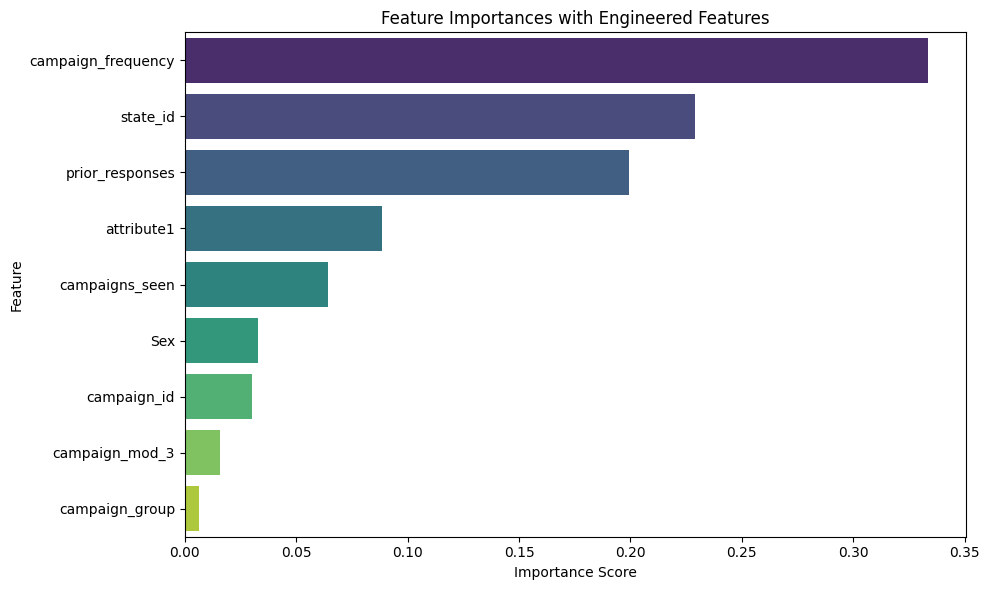

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importances_fe, palette="viridis")
plt.title("Feature Importances with Engineered Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
# Simulate Week 27 using Week 26 data
week26_fe = df_fe[df_fe["week_id"] == 26].copy()

# Features used for prediction
X_week27_fe = week26_fe[engineered_features]

# Predict response probability using the trained model
week26_fe["predicted_response"] = model_fe.predict_proba(X_week27_fe)[:, 1]

# Select top 25% subscribers based on predicted probability
top_25_count_fe = int(0.25 * len(week26_fe))
top_25_subscribers_fe = week26_fe.sort_values(by="predicted_response", ascending=False).head(top_25_count_fe)

# Assign campaign for Week 27 (rotate: campaign_id + 1, reset 10 → 1)
top_25_subscribers_fe["campaign_id_week27"] = top_25_subscribers_fe["campaign_id"].apply(lambda x: 1 if x == 10 else x + 1)

# Estimate expected response rate
expected_response_rate_fe = top_25_subscribers_fe["predicted_response"].mean()

# final result for top users
print("Subscribers to send emails to (top 25%):")
print(top_25_subscribers_fe["customer_id"].values[:10])  

print("\nAssigned campaign IDs for Week 27:")
print(top_25_subscribers_fe[["customer_id", "campaign_id_week27"]].head())

print(f"\nExpected response rate for Week 27: {expected_response_rate_fe:.2%}")


Subscribers to send emails to (top 25%):
[4189 6399 2651  834 9276 2647 2642 9269 6395  482]

Assigned campaign IDs for Week 27:
        customer_id  campaign_id_week27
254187         4189                   5
256397         6399                   5
252649         2651                   7
250832          834                  10
259274         9276                   2

Expected response rate for Week 27: 98.10%
